## Comparando Algoritmos de Dijkstra: Min-Heap e NetworkX


**Algoritmo de Dijkstra:**
- O algoritmo de Dijkstra é um método para encontrar o caminho mais curto em grafos ponderados com arestas de pesos positivos. Ele começa de um nó de origem, calcula as menores distâncias para os outros nós e constrói o caminho mais eficiente até o destino.


 **Requisito #1**
- Escolher 10 pares (origem,destino) como pontos de interesse da
cidade de Natal-RN e avaliar o algoritmo de dijkstra (networkx e
min heap) comparando visualmente as soluções no OSMnx.

  * Shopping Midway Mall, UFRN
  * Universidade Federal do Rio Grande do Norte (UFRN), Morro do careca
  * Praia de Ponta Negra, Praia do Meio
  * Arena das Dunas, Centro Histórico de Natal
  * Parque das Dunas,  Parnamirim (Av. Ayrton Senna)
  * Centro Histórico de Natal, Praia de Ponta Negra
  * Praia do Forte, Shopping Via Direta
  * Shopping Natal Sul,Parque das Dunas
  * Rodoviária de Natal, Arena das Dunas
  * Aeroporto Internacional de Natal (São Gonçalo do Amarante), Shopping Partage Norte

In [ ]:
!pip install osmnx

In [ ]:
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import heapq
import time

## Implementação de Dijkstra com Min-Heap


In [ ]:

# Função para implementação de Dijkstra com Min-Heap
def dijkstra_min_heap(graph, origem, destino):
    dist = {node: float('inf') for node in graph.nodes}
    dist[origem] = 0
    prev = {node: None for node in graph.nodes}
    min_heap = [(0, origem)]  # (distância acumulada, nó)

    while min_heap:
        current_dist, current_node = heapq.heappop(min_heap)

        if current_node == destino:
            break

        if current_dist > dist[current_node]:
            continue

        for neighbor, edge_data in graph[current_node].items():
            weight = edge_data[0].get("length", 1)
            distance = current_dist + weight

            if distance < dist[neighbor]:
                dist[neighbor] = distance
                prev[neighbor] = current_node
                heapq.heappush(min_heap, (distance, neighbor))

    # Reconstruir o caminho
    path = []
    node = destino
    while node is not None:
        path.insert(0, node)
        node = prev[node]

    return path

## Baixar dados da cidade de Natal-RN

In [ ]:

place = "Natal, Rio Grande do Norte, Brazil"
G = ox.graph_from_place(place, network_type="drive")

## Define vetores de origem e destino

In [ ]:

origens = [
    "Midway Mall, Natal", "UFRN, Natal", "Praia de Ponta Negra, Natal",
    "Arena das Dunas, Natal", "Parque das Dunas, Natal", "Centro Histórico, Natal",
    "Praia do Forte, Natal", "Shopping Natal Sul, Natal",
    "Rodoviária de Natal, Natal", "Aeroporto Internacional de Natal"
]

destinos = [
    "UFRN, Natal", "morro do careca, Natal", "Praia do Meio, Natal",
    "Centro Histórico, Natal", "Parnamirim, Natal", "Praia de Ponta Negra, Natal",
    "Shopping Via Direta, Natal", "Parque das Dunas, Natal",
    "Arena das Dunas, Natal", "Shopping Partage Norte, Natal"
]

## Comparar o tempo de execução dos algorimos

In [ ]:


# Lista para armazenar os tempos
resultados = []

# Iterar pelos pares de origem e destino
for i in range(len(origens)):
    # Obter coordenadas
    origem_coord = ox.geocode(origens[i])
    destino_coord = ox.geocode(destinos[i])

    # Encontrar os nós mais próximos no grafo
    origem = ox.distance.nearest_nodes(G, origem_coord[1], origem_coord[0])
    destino = ox.distance.nearest_nodes(G, destino_coord[1], destino_coord[0])

    # Dijkstra com Min-Heap
    start_time = time.time()
    path_min_heap = dijkstra_min_heap(G, origem, destino)
    time_min_heap = time.time() - start_time

    # Dijkstra com NetworkX
    start_time = time.time()
    path_nx = nx.shortest_path(G, origem, destino, weight="length")
    time_nx = time.time() - start_time

    # Salvar resultados, incluindo o caminho
    resultados.append({
        "origem": origens[i],
        "destino": destinos[i],
        "tempo_min_heap": time_min_heap,
        "tempo_networkx": time_nx,
        "path_min_heap": path_min_heap,  # Adiciona o caminho lculado por min_heap
        "path_nx": path_nx # Adiciona o caminho calculado por NetworkX

    })

# Exibir os resultados e plotar os grafos
print("\n--- Comparação dos Tempos de Execução ---\n")
for resultado in resultados:
    print(f"Origem: {resultado['origem']} -> Destino: {resultado['destino']}")
    print(f"Tempo (Min-Heap): {resultado['tempo_min_heap']:.6f} segundos")
    print(f"Tempo (NetworkX): {resultado['tempo_networkx']:.6f} segundos\n")



--- Comparação dos Tempos de Execução ---

Origem: Midway Mall, Natal -> Destino: UFRN, Natal
Tempo (Min-Heap): 0.037199 segundos
Tempo (NetworkX): 0.010849 segundos

Origem: UFRN, Natal -> Destino: morro do careca, Natal
Tempo (Min-Heap): 0.126754 segundos
Tempo (NetworkX): 0.028082 segundos

Origem: Praia de Ponta Negra, Natal -> Destino: Praia do Meio, Natal
Tempo (Min-Heap): 0.067330 segundos
Tempo (NetworkX): 0.041001 segundos

Origem: Arena das Dunas, Natal -> Destino: Centro Histórico, Natal
Tempo (Min-Heap): 0.095482 segundos
Tempo (NetworkX): 0.045431 segundos

Origem: Parque das Dunas, Natal -> Destino: Parnamirim, Natal
Tempo (Min-Heap): 0.147474 segundos
Tempo (NetworkX): 0.187904 segundos

Origem: Centro Histórico, Natal -> Destino: Praia de Ponta Negra, Natal
Tempo (Min-Heap): 0.091790 segundos
Tempo (NetworkX): 0.053451 segundos

Origem: Praia do Forte, Natal -> Destino: Shopping Via Direta, Natal
Tempo (Min-Heap): 0.135708 segundos
Tempo (NetworkX): 0.080711 segundos



##





--- Comparação dos Tempos de Execução ---

Origem: Midway Mall, Natal -> Destino: UFRN, Natal


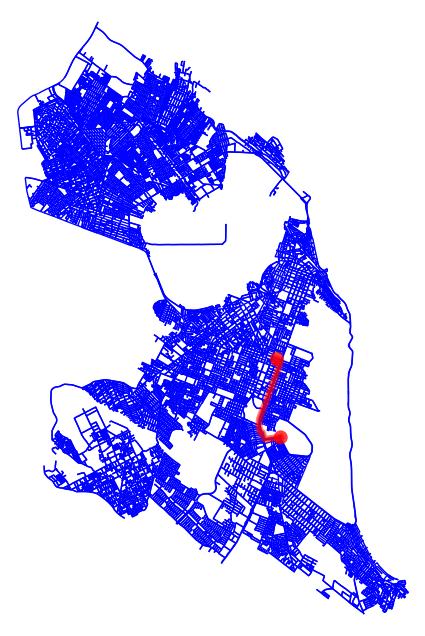

Origem: UFRN, Natal -> Destino: morro do careca, Natal


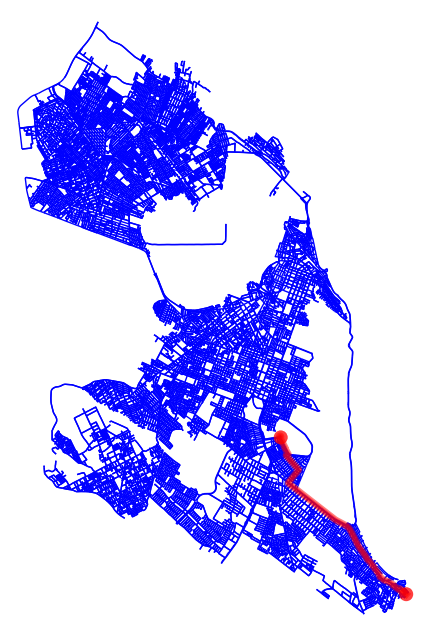

Origem: Praia de Ponta Negra, Natal -> Destino: Praia do Meio, Natal


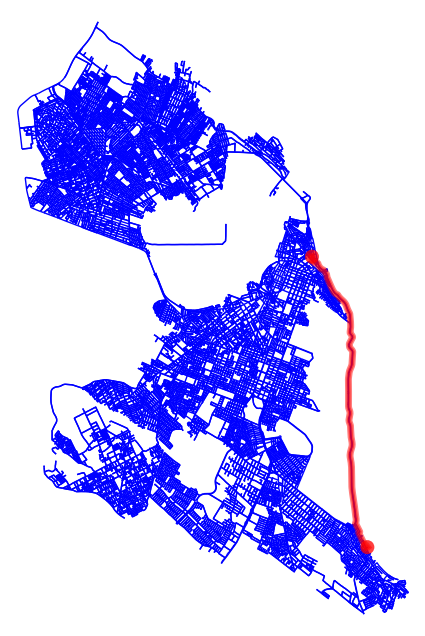

Origem: Arena das Dunas, Natal -> Destino: Centro Histórico, Natal


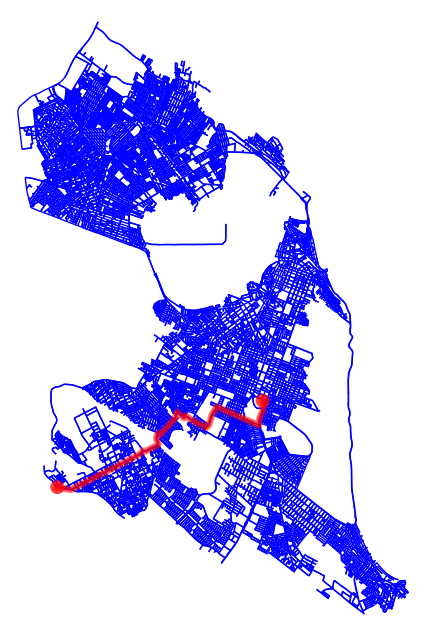

Origem: Parque das Dunas, Natal -> Destino: Parnamirim, Natal


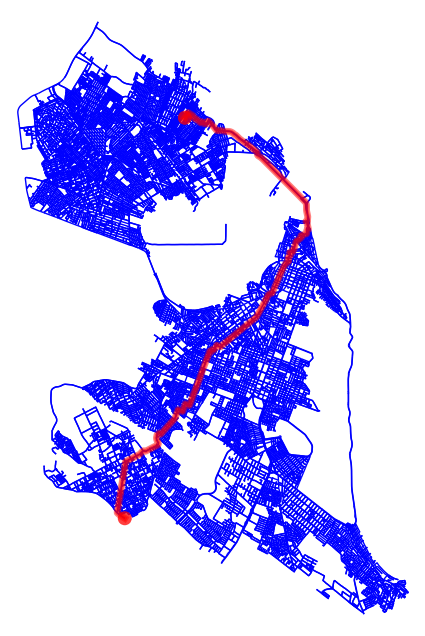

Origem: Centro Histórico, Natal -> Destino: Praia de Ponta Negra, Natal


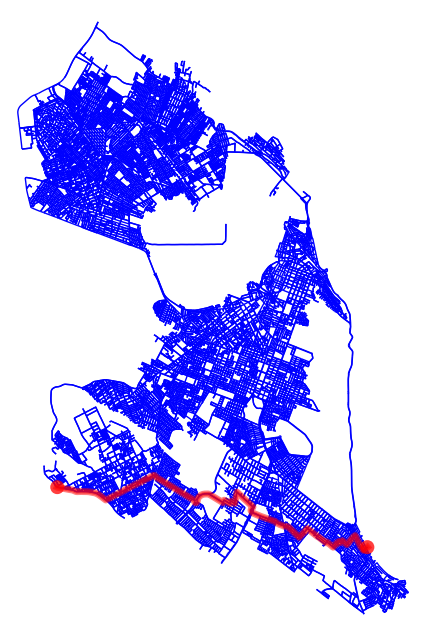

Origem: Praia do Forte, Natal -> Destino: Shopping Via Direta, Natal


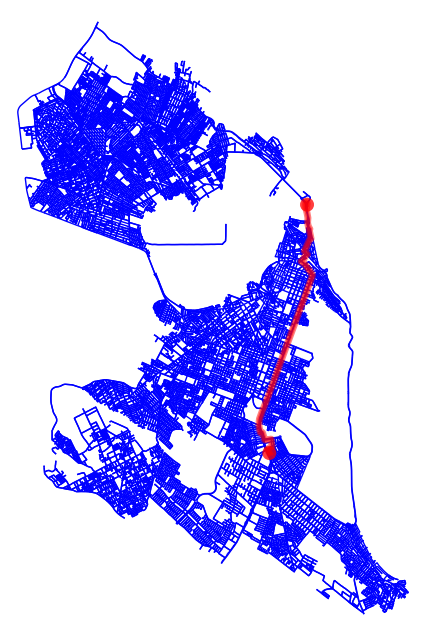

Origem: Shopping Natal Sul, Natal -> Destino: Parque das Dunas, Natal


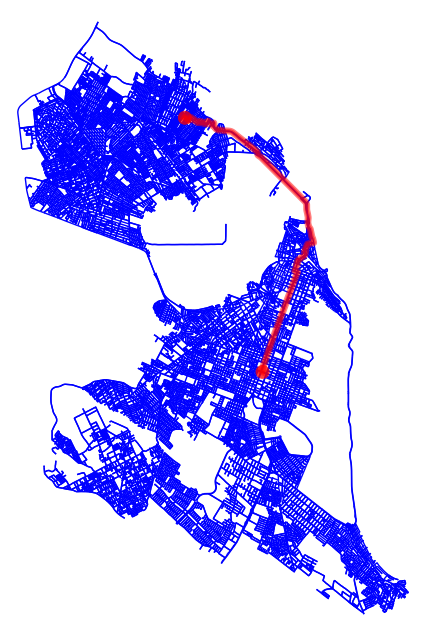

Origem: Rodoviária de Natal, Natal -> Destino: Arena das Dunas, Natal


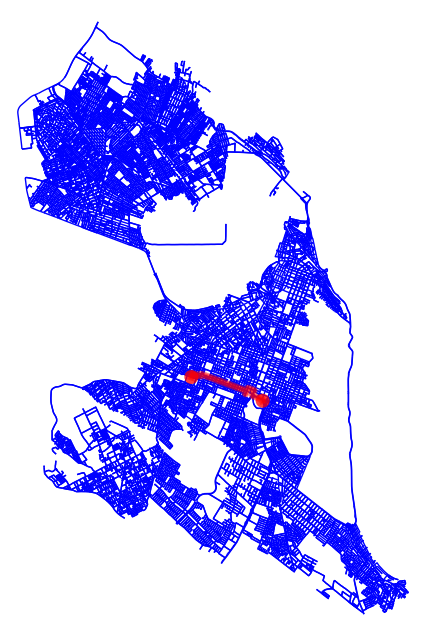

Origem: Aeroporto Internacional de Natal -> Destino: Shopping Partage Norte, Natal


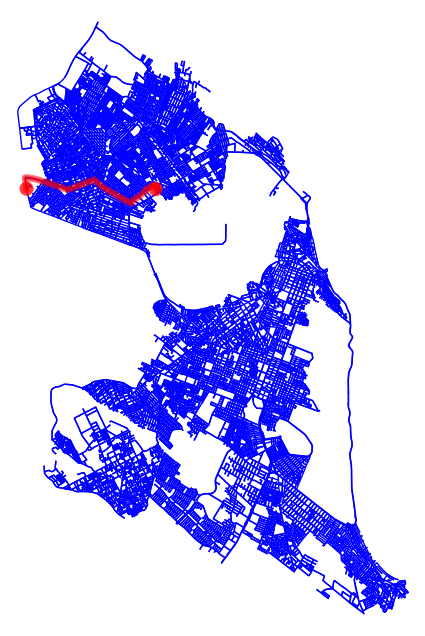

In [ ]:
# Exibir os resultados e plotar os grafos
print("\n--- Comparação dos Tempos de Execução ---\n")
for resultado in resultados:
    print(f"Origem: {resultado['origem']} -> Destino: {resultado['destino']}")
    # Visualização dos caminhos
    fig, ax = ox.plot_graph_route(G, resultado["path_nx"], route_linewidth=3, node_size=0, edge_color='blue', show=False, close=False, bgcolor='w')
    ox.plot_graph_route(G,  resultado["path_min_heap"], route_linewidth=5, node_size=0, edge_color='green', ax=ax, bgcolor='w',show=True)